In [1]:
# Cell 1: Imports
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

from pytorch_mlp import MLP

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [2]:
# Cell 2: Prepare Data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print(f"Train set size: {len(trainset)}")
print(f"Test set size: {len(testset)}")

Train set size: 50000
Test set size: 10000


In [3]:
# Cell 3: Hyperparameters & Model
n_inputs = 32 * 32 * 3 # 3072
n_hidden = [512, 256, 128]
n_classes = 10

model = MLP(n_inputs, n_hidden, n_classes).to(device) 

criterion = nn.CrossEntropyLoss()

# try different optimizers here
optimizer = optim.Adam(model.parameters(), lr=0.001) 

print(model)

MLP(
  (layers): ModuleList(
    (0): Linear(in_features=3072, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output_layer): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
# Cell 4: Training
epochs = 20
train_losses = []
test_losses = []
test_accs = []

epochs = 20 

print("Start Training...")
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        if isinstance(model, MLP): 
            inputs = inputs.view(-1, 3072)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    avg_train_loss = running_loss / len(trainloader)
    train_losses.append(avg_train_loss)
    
    model.eval()
    test_loss_sum = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            
            if isinstance(model, MLP):
                images = images.view(-1, 3072)
            
            outputs = model(images)
            
            loss = criterion(outputs, labels)
            test_loss_sum += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    avg_test_loss = test_loss_sum / len(testloader) 
    test_losses.append(avg_test_loss)
    
    acc = 100 * correct / total
    test_accs.append(acc)
    
    print(f"Epoch [{epoch+1}/{epochs}] "
          f"Train Loss: {avg_train_loss:.4f} | "
          f"Test Loss: {avg_test_loss:.4f} | "  
          f"Test Acc: {acc:.2f}%")

print('Finished Training')

Start Training...
Epoch [1/20] Train Loss: 1.6594 | Test Loss: 1.5466 | Test Acc: 45.91%
Epoch [2/20] Train Loss: 1.4362 | Test Loss: 1.4390 | Test Acc: 48.95%
Epoch [3/20] Train Loss: 1.3237 | Test Loss: 1.3911 | Test Acc: 51.31%
Epoch [4/20] Train Loss: 1.2304 | Test Loss: 1.3566 | Test Acc: 52.64%
Epoch [5/20] Train Loss: 1.1491 | Test Loss: 1.3593 | Test Acc: 53.83%
Epoch [6/20] Train Loss: 1.0734 | Test Loss: 1.3977 | Test Acc: 53.01%
Epoch [7/20] Train Loss: 1.0014 | Test Loss: 1.3755 | Test Acc: 54.06%
Epoch [8/20] Train Loss: 0.9306 | Test Loss: 1.4483 | Test Acc: 53.98%
Epoch [9/20] Train Loss: 0.8646 | Test Loss: 1.4642 | Test Acc: 54.24%
Epoch [10/20] Train Loss: 0.8004 | Test Loss: 1.5187 | Test Acc: 53.94%
Epoch [11/20] Train Loss: 0.7420 | Test Loss: 1.5649 | Test Acc: 54.28%
Epoch [12/20] Train Loss: 0.6837 | Test Loss: 1.6875 | Test Acc: 53.94%
Epoch [13/20] Train Loss: 0.6410 | Test Loss: 1.7300 | Test Acc: 53.65%
Epoch [14/20] Train Loss: 0.5899 | Test Loss: 1.8107 | 

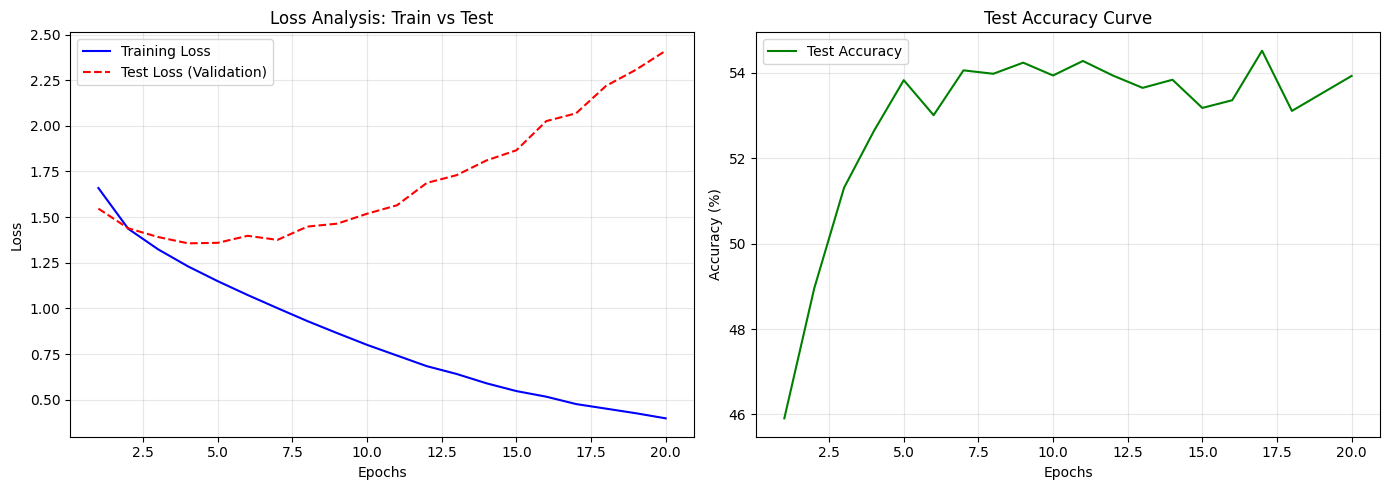

In [ ]:
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, 'b-', label='Training Loss')
plt.plot(epochs_range, test_losses, 'r--', label='Test Loss (Validation)')
plt.title('Loss Analysis: Train vs Test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, test_accs, 'g-', label='Test Accuracy')
plt.title('Test Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()